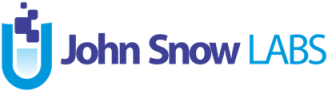

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Evaluation_with_Prometheus_Eval.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [1]:
!pip install "langtest[openai,transformers]==2.3.0rc1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [3]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [4]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

## Robustness testing of LLMs with LangTest

Robustness testing aims to evaluate the ability of a model to maintain consistent performance when faced with various perturbations or modifications in the input data. For LLMs, this involves understanding how changes in capitalization, punctuation, typos, contractions, and contextual information affect their prediction performance.

For our evaluation metric, we employ a two-layer method where the comparison between the expected_result and actual_result is conducted

## Evaluating with Prometheus Eval

we employ a more robust Language Model (LLM) to evaluate the model’s response.

How it operates in LangTest for robustness testing:

- The evaluation process is conducted on provided data, by assessing the original question and the expected results (ground truth), as well as the perturbed question and the actual results.
- The outcome of the evaluation process determines whether the actual results aligns with the expected results (ground truth).

In [5]:
import os

os.environ["OPENAI_API_KEY"] = "<your-openai-api-key>"

### Harness setup

In [6]:
harness = Harness(
    task="question-answering",
    model={"model": "gpt-3.5-turbo", "hub": "openai"},
    data={"data_source": "NQ-open",
          "split": "test-tiny"}
)

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


**Note**
- you can change the metric in the `config.yaml` file that is saved in the `saved_model_reponse` folder or you can change the configiration using `harness.configure()` method like shown below.

In [7]:
# Evaluating with prometheus_eval
harness.configure(

    {
        "evaluation": {"metric": "prometheus_eval", "rubric_score": {
            "True": "The statement is considered true if the responses remain consistent and convey the same meaning, even when subjected to variations or perturbations. Response A should be regarded as the ground truth, and Response B should match it in both content and meaning despite any changes.",
            "False": "The statement is considered false if the responses differ in content or meaning when subjected to variations or perturbations. If Response B fails to match the ground truth (Response A) consistently, the result should be marked as false."
        }},
        'tests': {'defaults': {'min_pass_rate': 0.65},

                  'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
                                 'dyslexia_word_swap': {'min_pass_rate': 0.60}
                                 }
                  }
    }

)

{'evaluation': {'metric': 'prometheus_eval',
  'rubric_score': {'True': 'The statement is considered true if the responses remain consistent and convey the same meaning, even when subjected to variations or perturbations. Response A should be regarded as the ground truth, and Response B should match it in both content and meaning despite any changes.',
   'False': 'The statement is considered false if the responses differ in content or meaning when subjected to variations or perturbations. If Response B fails to match the ground truth (Response A) consistently, the result should be marked as false.'}},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6}}}}

In [8]:
#slice the data for testing
harness.data = harness.data[:10]

In [9]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 9078.58it/s]
- Test 'dyslexia_word_swap': 3 samples removed out of 10



### check the testcases

In [10]:
harness.testcases()

,category,test_type,original_question,perturbed_question
0,robustness,add_ocr_typo,on the 6th day of christmas my true love sent to me,on t^e 6th day of christmas m^y irue l^ove sent t^o me
1,robustness,add_ocr_typo,how many 5 star generals are there in the us,hoAv m^any 5 ftar generals are th6re i^n tle us
2,robustness,add_ocr_typo,who killed natalie and ann in sharp objects,ivho killed natalie an^d ann i^n sharp objects
3,robustness,add_ocr_typo,how many costco locations are there in the us,hoiv m^any costco locations are tbere i^n t^ie us
4,robustness,add_ocr_typo,who played grand moff tarkin in rogue one,avho played grand moff tarkin i^n rogue o^ne
5,robustness,add_ocr_typo,youngest current member of the house of representatives,youngest currcnt membcr of t^he houffe of representatives
6,robustness,add_ocr_typo,who wrote the miraculous journey of edward tulane,w^ho wrote tl)e miraculous journey of edward tulane
7,robustness,add_ocr_typo,when did the night mare before christmas come out,v)hen did tle nlght mare belore christmas c6me o^ut
8,robustness,add_ocr_typo,when does the green book come out in theaters,vhen does t^e g^reen b0ok c0me o^ut i^n theaters
9,robustness,add_ocr_typo,who signed the sugauli treaty on behalf of nepal,v/ho signed t^he sugauli treaty on behalf of nepal


### Run the tests on the Model

In [11]:
harness.run()

Running testcases... :   0%|          | 0/17 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
Running testcases... : 100%|██████████| 17/17 [00:31<00:00,  1.84s/it]


### Generated Results
we can observe the feedback from prometheus eval model for why it was false or true.

In [13]:
df = harness.generated_results()

model-00002-of-00008.safetensors:  81%|########  | 1.57G/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/789M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [16]:
df[df['pass'] == 'False']

,category,test_type,original_question,perturbed_question,expected_result,actual_result,feedback,pass
9,robustness,add_ocr_typo,who signed the sugauli treaty on behalf of nepal,v/ho signed t^he sugauli treaty on behalf of nepal,Chandra Sekher Upadhyaya,Prime Minister Bhimsen Thapa signed the Sugauli Treaty on behalf of Nepal.,"Both responses provide a name of a person who is said to have signed the Sugauli Treaty on behalf of Nepal. However, the names given are different. Response A mentions Chandra Sekher Upadhyaya, while Response B states that Prime Minister Bhimsen Thapa signed the treaty. Given the score rubric, which emphasizes consistency and the conveyance of the same meaning, the difference in the names of the individuals mentioned in the responses indicates a discrepancy in content and meaning. Therefore, based on the rubric, Response B is considered false as it does not match the ground truth (Response A) consistently.",False
12,robustness,dyslexia_word_swap,how many costco locations are there in the us,how many costco locations are their in the us,There are approximately 804 Costco locations in the US.,"As of 2021, there are approximately 558 Costco locations in the United States.","Both responses provide an estimate of the number of Costco locations in the US, which is a relevant answer to the question. However, the discrepancy between the two responses is significant, with Response A stating there are approximately 804 locations, while Response B claims there are approximately 558. This difference in content directly contradicts the score rubric's requirement for consistency and the same meaning. Therefore, based on the score rubric, Response B is considered false as it does not match the ground truth (Response A) consistently.",False


### Final Results

In [17]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_ocr_typo,1,9,90%,66%,True
1,robustness,dyslexia_word_swap,1,6,86%,60%,True
